
# Women's ICC T20 World Cup data visualisation, 
Here we look at the 5 most recent tournaments, taking place in 2014, 2016, 2018, 2020 and 2023. It's been interesting to be able to see some of the changes in women's cricket over the years, and some of the things which have stayed the same. It's also interesting to note some of the players who have been involved in there international setup for quite some time, and contributed a lot over many different tournaments. Any feedback would be much appreciated :)


The csv files used can be found at : https://www.kaggle.com/datasets/acidbear55/icc-womens-t20-world-cups-2014-2023/data

Original json files/stats taken from https://cricsheet.org/downloads/

In [169]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=SyntaxWarning)

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
# any players who have competed under multiple names can be added here to ensure all 
# contributions made by them are considered
NAME_CHANGES = {
    "NR Sciver": "NR Sciver-Brunt",
    "KH Brunt" : "KH Sciver-Brunt",
}

def namecheck(player): 
    # if player has changed name, replaces old with new
    try:
        return NAME_CHANGES[player]
    except KeyError:
        return player

# colours for country to be displayed as on charts, and country tag
COUNTRY_INFO = {
    "Australia" : ("xkcd:canary yellow", "AUS"),
    "Bangladesh" : ("xkcd:pine","BAN"),
    "England": ("xkcd:bright red","ENG"),
    "India": ("xkcd:royal blue", "IND"),
    "Ireland" : ("xkcd:bright green","IRL"),
    "New Zealand": ("xkcd:slate grey", "NZL"),
    "Pakistan" : ("xkcd:emerald", "PAK"),
    "Thailand" : ("xkcd:bright sky blue", "THA"),
    "South Africa" : ("xkcd:yellow/green", "RSA"),
    "Sri Lanka" : ("xkcd:mid blue", "SRI"),
    "West Indies" : ("xkcd:maroon","WIN"),
}

In [170]:
# Read in the data
original_data = pd.read_csv("..\csv files\ICC_Cup_Data.csv")
player_data = pd.read_csv("..\csv files\WCPlayersList.csv")

def find_nationality(player):
    # utility to find the nationality of a certain player
    for k in player_data.columns:
        if player in player_data[k].values:
            return k

# The teams

Firstly we see that Australia are clearly the dominant team, taking the trophy in 4 of the past 5 tournaments with the only exception being in 2016, with the West Indies winning instead. All the top teams can be seen at each edition of the tournament, consistently winning a fair number of games. It's interesting to note every year features the same 9 teams, with Ireland and Thailand swapping in and out. This shows the fairly small number of countries with a competitive women's team, which is to be expected with the lack of funding and solid domestic setup many countries lack. The expansion of the 2024 and 2030 world cups to 12 and 16 teams respectively could hopefully begin to change this.


In [171]:
def make_pie_charts(column,colours,axis,df,title):
    # utility to make a pie chart of a certain style
    counts =  df[column].value_counts().sort_index().tolist() 
    for_legend,texts,_ = axis.pie(x=counts,colors=colours,autopct='%1.1f%%',
                                  wedgeprops={'edgecolor' : 'black'},textprops={'fontsize' : 12},
                                 radius=1.25)
    axis.set_title(title)
    return for_legend

def bat_first_and_won(row):
    # utility to work out if the team who batted first won the game (returns True)
    cond1 = row['decision from toss'] == 'bat' and row['toss_and_game_win']
    cond2 = row['decision from toss'] == 'field' and not row['toss_and_game_win']
    if cond1 or cond2:
        return True
    return False

pieChart_data = original_data[['season','toss winner','winner','decision from toss','was result?']].copy()
pieChart_data['toss_and_game_win'] = pieChart_data['toss winner'] == pieChart_data['winner']
pieChart_data['batting_first_and_won'] = pieChart_data.apply(bat_first_and_won,axis=1)

# splits data by world cup edition
y2014, y2016, y2018, y2020, y2023 = [x for _,x in pieChart_data.groupby(pieChart_data['season'])]
dfs = [y2014,y2016,y2018,y2020,y2023]
titles = ["2014","2016","2018","2020","2023"]

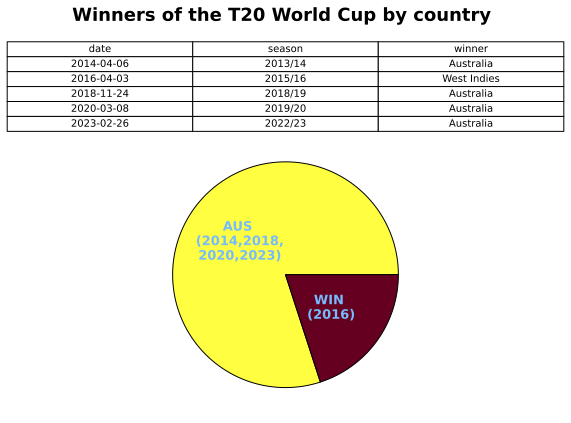

In [172]:
def format(pct):
    #utility for making the labels for this specific pie chart
    if int(pct) == 80:
        return "AUS \n(2014,2018,\n2020,2023)"
    return "WIN \n(2016)"

finals_wins = original_data[original_data['stage'] == 'Final'].copy()
finals_wins = finals_wins[['date','season','winner']]
counts = finals_wins['winner'].value_counts().sort_index().tolist()

fig1,ax1 = plt.subplots(2,1,gridspec_kw={'height_ratios': [1, 3]},figsize=(9,6))
ax1[1].pie(counts,autopct=lambda pct : format(pct),colors=['xkcd:canary yellow','xkcd:maroon'],
        wedgeprops={'edgecolor' : 'black'},textprops=dict(color="xkcd:sky blue",fontweight='bold',fontsize=13),
       pctdistance=0.5)
fig1.suptitle("Winners of the T20 World Cup by country",fontsize=18,fontweight='bold')
ax1[0].axis('off')
ax1[0].table(cellText=finals_wins.values, colLabels=finals_wins.keys(), loc='center',cellLoc='center')
fig1.subplots_adjust(left=0.076,bottom=0.033,right=0.936,top=0.905,wspace=0.198,hspace=0)

In [173]:
winnerDf = original_data[['winner','season','Team 1','Team 2']].copy()
y2014c, y2016c, y2018c, y2020c, y2023c = [x for _,x in winnerDf.groupby(winnerDf['season'])]
dfsc = [y2014c,y2016c,y2018c,y2020c,y2023c]

# extra code to ensure all teams who competed in that years competition show up (even with 0 wins)
years = []
for j in dfsc:
    winners = j['winner'].value_counts().sort_index().index.tolist()
    all_teams = np.concatenate([j['Team 1'].unique(),j['Team 2'].unique()],axis=0)
    missing = list(set(all_teams) - set(winners))
    wins = j['winner'].value_counts().sort_index().tolist() 
    wins += [0] * len(missing)
    winners += missing
    years.append((list(zip(*sorted(list(zip(winners,wins)))))))

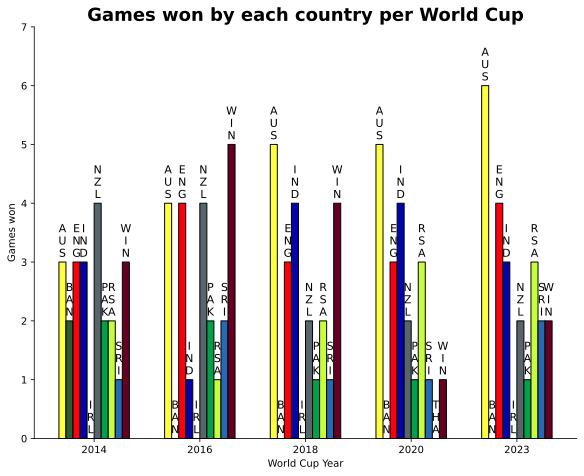

In [174]:
fig2, ax2 = plt.subplots(figsize=(8,6.5),layout='constrained')

for count, [teams,wins] in enumerate(years):
    offset = 30 * count
    colours = [COUNTRY_INFO[team][0] for team in teams]
    labels = [COUNTRY_INFO[team][1] for team in teams]
    formatted_labels = ['\n'.join(i) for i in labels]
    rects = ax2.bar(2*np.arange(len(teams)) + offset, wins,2,color=colours,edgecolor='black')
    ax2.bar_label(rects, labels=formatted_labels, padding=3,fontsize=11)

ax2.set_ylabel('Games won')
ax2.set_xlabel("World Cup Year")
ax2.set_title('Games won by each country per World Cup',fontsize=18,fontweight='bold')
ax2.set_xticks(30*np.arange(5)+9, titles)
ax2.set_ylim(0, 7)
ax2.spines[['right', 'top']].set_visible(False)

Not many different players have represented each country since 2014, with the widest selection being made by India with 36 different players. Most of the top teams have kept a fairly consistent team selection over the years.

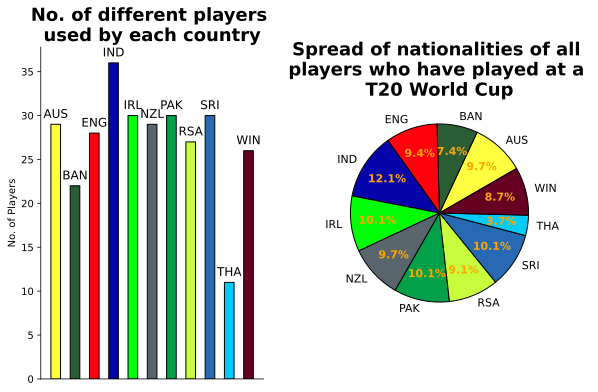

In [175]:
fig3 = plt.figure(figsize=(8, 6))
subfigs = fig3.subfigures(1, 2,)
ax3a = subfigs[0].subplots()
ax3b = subfigs[1].subplots()

player_counts = player_data.count(axis=0)
values = player_counts.to_list()
labels = [COUNTRY_INFO[j][1] for j in player_counts.index.to_list()]
colours = [COUNTRY_INFO[j][0] for j in player_counts.index.to_list()]

rects = ax3a.bar(2*np.arange(len(labels)),values,1,color=colours,edgecolor='black')
ax3a.bar_label(rects,labels=labels,padding=4,fontsize=12)
ax3a.set_ylabel("No. of Players")
ax3a.set_title("No. of different players \nused by each country"
              ,fontsize=18,fontweight='bold')
ax3a.set_xticks([])
ax3a.spines[['right', 'top']].set_visible(False)

ax3b.set_title("Spread of nationalities of all \nplayers who have played at a \nT20 World Cup"
              ,fontsize=18,fontweight='bold')

_, _, autotexts  = ax3b.pie(x=player_counts,colors=colours,autopct='%1.1f%%',labels=labels,
                            wedgeprops={'edgecolor' : 'black'},textprops={'fontsize' : 11},startangle=30,
                           pctdistance=0.7)
for autotext in autotexts:
    autotext.set_color('orange')
    autotext.set_fontweight('bold')

# The toss

Across every tournmanet choosing to bat first after winning the toss has proved more popular, no matter where the tournament has been held. We can also see that in every tournament batting first has led to more success than chasing, with the split being consistently around 60/40. It seems that winning the toss could actually be slightly detrimental with teams tending to be more likely to lose after winning the toss. However these numbers are very close to 50/50 which is what we would hope for.

Interestingly in 2014 there were only 4 matches where teams chose to field first. These were the first 2 matches of the tournament, the semi-final and the final. The other years saw a more balanced split between teams choosing to field rather than bat, although 2023 also saw not many teams wanting to field first. 

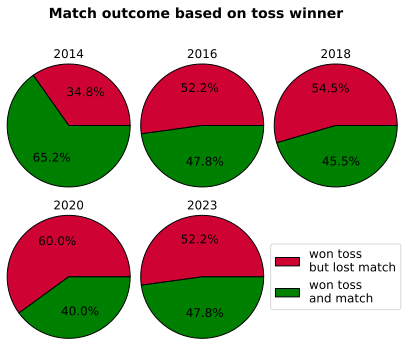

In [176]:
fig4, ax4 = plt.subplots(2,3,figsize=(7,7))
axes4 = ax4.ravel()
for (i,j,k) in zip(axes4,dfs,titles):
    cleaned_df = j[j['was result?'].isna()]
    colours = make_pie_charts('toss_and_game_win',['xkcd:cherry','green'],i,cleaned_df,k,)
axes4[5].set_axis_off()
axes4[5].legend((colours[0],colours[1]),('won toss \nbut lost match','won toss \nand match'),loc='center',fontsize=12)
fig4.suptitle("Match outcome based on toss winner",fontsize=14,fontweight='bold')
fig4.subplots_adjust(bottom=0.31,top=0.88,wspace=0.086,hspace=0.117)

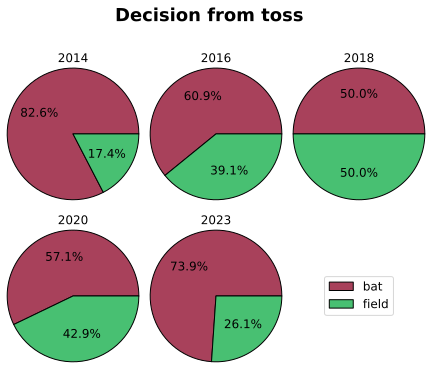

In [177]:
fig5a , ax5a = plt.subplots(2,3,figsize=(7.5,7.5))
axes5a = ax5a.ravel()
for (i,j,k) in zip(axes5a,dfs,titles):
    colours = make_pie_charts('decision from toss',['xkcd:light burgundy','xkcd:dark mint'],i,j,k)
    
axes5a[5].set_axis_off()
axes5a[5].legend((colours[0],colours[1]),('bat','field'),loc='center',fontsize=12)
fig5a.suptitle("Decision from toss",fontsize=18,fontweight='bold')
fig5a.subplots_adjust(bottom=0.31,top=0.88,wspace=0.086,hspace=0.117)

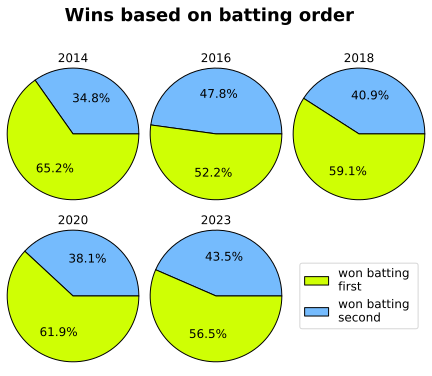

In [178]:
fig5b , ax5b = plt.subplots(2,3,figsize=(7.5,7.5))
axes5b = ax5b.ravel()
for (i,j,k) in zip(axes5b,dfs,titles):
    colours = make_pie_charts("batting_first_and_won",['xkcd:sky blue','xkcd:neon yellow'],i,j,k,)
    
axes5b[5].set_axis_off()
axes5b[5].legend((colours[1],colours[0]),('won batting \nfirst','won batting \nsecond'),loc='center',fontsize=12)
fig5b.suptitle("Wins based on batting order",fontsize=18,fontweight='bold')
fig5b.subplots_adjust(bottom=0.31,top=0.88,wspace=0.086,hspace=0.117)

# Win margins

We see that a lot of the biggest wins have come in recent times, perhaps a sign of the widening gap between the better financed 'big' teams, and the rest of the competition. It'll be interesting to see if this a problem which continues to worsen, or if it'll begin to improve and there are more close matches. However it is a fairly wide spread of teams who have had these resounding victories, not just Australia, England and India. 

In [179]:
biggest_wins_df=original_data[['won by (runs)','won by (wickets)', 'winner','loser','Team 1', 'Team 2','date']].copy()
top_runs = (biggest_wins_df.nlargest(5,columns='won by (runs)',keep='all'))
top_wicks = (biggest_wins_df.nlargest(5,columns='won by (wickets)',keep='all'))

def horizontal_bar_chart(ax,df,text_offset,column):
    # utility to produce a horizontal bar chart in a certain style
    colours = [COUNTRY_INFO[j][0] for j in df['winner']]
    labels = [f"{COUNTRY_INFO[row['winner']][1]} (vs {COUNTRY_INFO[row['loser']][1]}), {row['date'][0:4]}" 
              for _, row in df.iterrows()]
    rects = ax.barh(np.arange(len(df)) , df[column],0.65,color=colours,edgecolor='black')
    ax.bar_label(rects, padding=3,fontsize=15)
    for bar,label in zip(rects,labels):
        ax.text(text_offset, bar.get_y()+bar.get_height()/2, label, color = 'xkcd:hot pink', 
                backgroundcolor= 'xkcd:light blue', ha = 'left', va = 'center',fontweight='bold',fontsize=13) 
    ax.set_yticks([])
    ax.spines[['right', 'top']].set_visible(False)

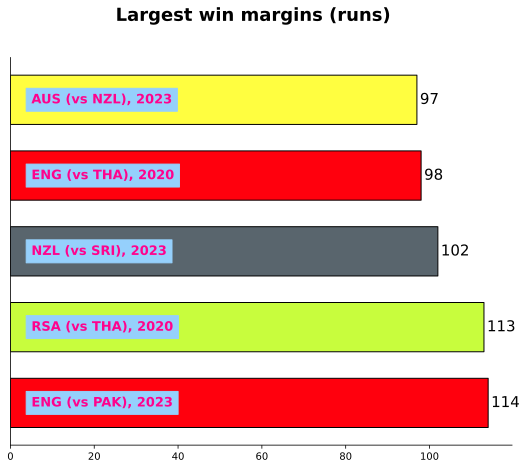

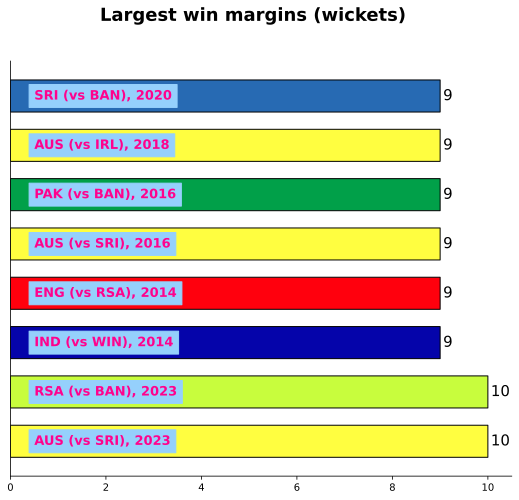

In [180]:
fig6 , ax6 = plt.subplots(figsize=(9, 7))
fig7 , ax7 = plt.subplots(figsize=(9, 7.5))
fig6.suptitle("Largest win margins (runs)",fontsize=18,fontweight='bold')
fig7.suptitle("Largest win margins (wickets)",fontsize=18,fontweight='bold')

horizontal_bar_chart(ax6,top_runs,5,'won by (runs)')
horizontal_bar_chart(ax7,top_wicks,0.5,'won by (wickets)')

# Individual Player Achievements

Here we can see some of the players who have played big roles for their country at T20 world cups. The 4 players with the most appearances are all Australian, with these numbers likely to increase for some of them as they may be picked for the 2024 WC. 

Impressively, Alyssa Healy has picked up 7 POTM awards across her 27 appearances, making her POTM in over a quarter of the matches she has played (26%). Similarly, 5 for Nat Sciver-Brunt (24 matches) and 5 for Suzie Bates (22 matches) made them POTM in 21% and 23% of their matches respectively.

In [181]:
player_achievements = original_data[['player_of_match','Team 1 Players','Team 2 Players',
                                     'Team 1','Team 2']].copy().map(namecheck)
most_potms = (player_achievements['player_of_match'].value_counts()).nlargest(6,keep='all')

valuesPOTM = most_potms.to_list()
coloursPOTM = [COUNTRY_INFO[find_nationality(k)][0] for k in most_potms.index.to_list()]
labelsPOTM = [f"{k}\n({COUNTRY_INFO[find_nationality(k)][1]})" for k in most_potms.index.to_list()]
player_list = []

def format(row):
    row['Team 1 Players'] = [namecheck(r) for r in row['Team 1 Players'].split("'") if r[0].isalpha()]
    row['Team 2 Players'] = [namecheck(r) for r in row['Team 2 Players'].split("'") if r[0].isalpha()]
    player_list.append(pd.Series(row['Team 1 Players']))
    player_list.append(pd.Series(row['Team 2 Players']))
    return row

get_player_list = player_achievements.apply(lambda x : format(x),axis = 1)
most_apps = (pd.concat(player_list,axis=0)).value_counts().nlargest(10,keep='all')
valuesAPPS = most_apps.to_list()
labelsAPPS = [f"{k}\n{COUNTRY_INFO[find_nationality(k)][1]}" for k in most_apps.index.to_list()]
coloursAPPS = [COUNTRY_INFO[find_nationality(k)][0] for k in most_apps.index.to_list()]

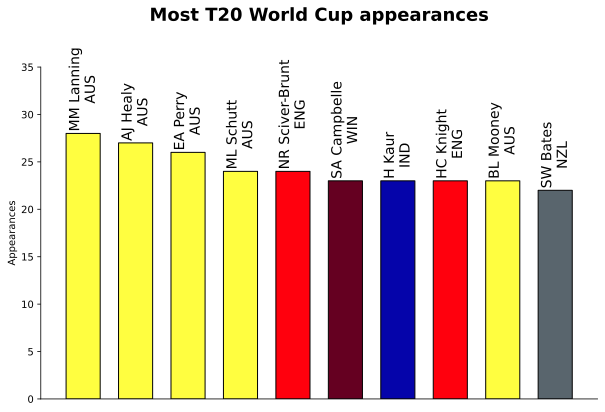

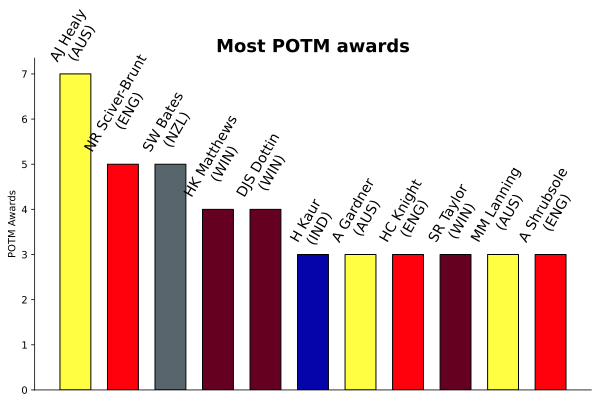

In [182]:
fig8a, ax8a = plt.subplots(figsize=(10, 6))
fig8b, ax8b = plt.subplots(figsize=(10,6))

rects = ax8a.bar(2*np.arange(len(labelsAPPS)) ,valuesAPPS ,1.3,color=coloursAPPS,edgecolor='black')
ax8a.bar_label(rects, labels=labelsAPPS, padding=2,rotation=90,fontsize=14)
rects = ax8b.bar(2*np.arange(len(labelsPOTM)) ,valuesPOTM ,1.3,color=coloursPOTM,edgecolor='black')
ax8b.bar_label(rects, labels=labelsPOTM, padding=2,rotation=60,fontsize=14)
ax8a.set_ylim(0,35)
for ax,y_label,title in zip([ax8a,ax8b],['Appearances','POTM Awards'],
                            ['Most T20 World Cup appearances\n\n','Most POTM awards']):
    ax.set_title(title,fontsize=18,fontweight='bold')
    ax.set_xticks([]); ax.set_ylabel(y_label)
    ax.spines[['right', 'top']].set_visible(False)

Thank you very much for checking out this notebook🙏. Any feedback (both positive and negative) would be much appreciated.

Feel free to check out the dataset this is based on from : https://www.kaggle.com/datasets/acidbear55/icc-womens-t20-world-cups-2014-2023/data